# Исследование рынка заведений общественного питания Москвы

В нашем распоряжении есть открытые данные о заведениях общественного питания в Москве.

Нам предстоит оценить для инвесторов положение дел на рынке общественного питания и предсказать популярность нашего проекта -  кафе с официантами-роботами. 

## Изучение данных из файлов

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 30)
pd.set_option("display.float_format", "{:.2f}".format)
import warnings
warnings.simplefilter('ignore')

In [2]:
# чтение файла с данными и сохранение в переменные
df = pd.read_csv('../../yandex-praktikum-sources/rest_data.csv')

In [3]:
display(df.head(15))
display(df.info())
print(f'Количество дубликатов {df.duplicated().sum()}')

id               object_name chain object_type  \
0   151635                   СМЕТАНА   нет        кафе   
1    77874                    Родник   нет        кафе   
2    24309           Кафе «Академия»   нет        кафе   
3    21894                ПИЦЦЕТОРИЯ    да        кафе   
4   119365    Кафе «Вишневая метель»   нет        кафе   
5    27429  СТОЛ. ПРИ ГОУ СОШ № 1051   нет    столовая   
6   148815                  Брусника    да        кафе   
7    20957               Буфет МТУСИ   нет    столовая   
8    20958               КПФ СЕМЬЯ-1   нет    столовая   
9    28858            Столовая МТУСИ   нет    столовая   
10  148595                Пекарня 24   нет  закусочная   
11   23394                   Гогиели   нет        кафе   
12   28582                 ШКОЛА 735   нет    столовая   
13   22579                Алло Пицца    да        кафе   
14   23670             Гимназия 1542   нет    столовая   

                                              address  number  
0          город Москва, улица Егора Абакумова, дом 9      48  
1   город Москва, улица Талалихина, дом 2/1, корпус 1      35  
2           город Москва, Абельмановская улица, дом 6      95  
3             город Москва, Абрамцевская улица, дом 1      40  
4   город Москва, Абрамцевская улица, дом 9, корпус 1      50  
5   город Москва, Абрамцевская улица, дом 15, корп...     240  
6       город Москва, переулок Сивцев Вражек, дом 6/2      10  
7   город Москва, Авиамоторная улица, дом 8, строе...      90  
8   город Москва, Авиамоторная улица, дом 8, строе...     150  
9   город Москва, Авиамоторная улица, дом 8, строе...     120  
10           город Москва, Авиамоторная улица, дом 47       5  
11         город Москва, Авиамоторная улица, дом 49/1      24  
12           город Москва, Авиамоторная улица, дом 51     140  
13              город Москва, улица Авиаторов, дом 14      32  
14              город Москва, улица Авиаторов, дом 16     270

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


None

Количество дубликатов 0


Файл содержит информацию о 15366 объектах общественного питания. Согласно документации к данным:
- `id` — идентификатор объекта;
- `object_name` — название объекта общественного питания;
- `chain` — сетевой ресторан;
- `object_type` — тип объекта общественного питания;
- `address` — адрес;
- `number` — количество посадочных мест

Полных дубликатов и пропусков в данных нет.

## Подготовка данных

### Извлечение названия улицы из адреса
В дальнейшем исследовании нам потребуется изучить расположение объектов. Извлечем из адресов название улицы. 

Для этого воспользуемся тем, что данные хорошо подготовлены, и каждый адрес записан в формате "город %название, улица %название, дом %номер", и напишем небольшую функцию для извлечения названия улицы. Затем протестируем на небольшом куске данных. 

In [4]:
# функция для извлечения названия улицы
def street_check(row):
    address = row['address'].split(', ')
    street = address[1]
    return street
# вырезаем тестовый кусочек данных
test = df.sample(10)
test['street'] = test.apply(street_check, axis=1)

display(test)

id                                        object_name chain  \
11472  181836                                           Столовая   нет   
3464    21422                                Столовая лицея 1550   нет   
1743   136665                                   Солнце в тарелке   нет   
5917   109998                                Павильон «Кукуруза»   нет   
10961  185893                                               МиЛя   нет   
10906  148582                                            Пекарня   нет   
2019   153470  Столовая при ГБУЗ ГКБ им. С.П. Боткина, филиал...   нет   
10634  185464                               Так сказала моя мама   нет   
8095   154749                                            Теремок    да   
9665   168625                                               Дуэт   нет   

                             object_type  \
11472                           столовая   
3464                               буфет   
1743                                кафе   
5917                          закусочная   
10961                               кафе   
10906  предприятие быстрого обслуживания   
2019                            столовая   
10634                               кафе   
8095   предприятие быстрого обслуживания   
9665                            ресторан   

                                                 address  number  \
11472  город Москва, улица Подольских Курсантов, дом ...      76   
3464          город Москва, 1-й Боткинский проезд, дом 9      84   
1743               город Москва, улица Столетова, дом 17      40   
5917             город Москва, Люблинская улица, дом 153       2   
10961  город Москва, Новоалексеевская улица, дом 12, ...      27   
10906               город Москва, Саянская улица, дом 9Б       0   
2019       город Москва, Малая Пироговская улица, дом 15     140   
10634  город Москва, Большой Симоновский переулок, дом 2      16   
8095   город Москва, Нижний Сусальный переулок, дом 5...      40   
9665                 город Москва, Озёрная улица, дом 42     228   

                             street  
11472    улица Подольских Курсантов  
3464          1-й Боткинский проезд  
1743                улица Столетова  
5917               Люблинская улица  
10961        Новоалексеевская улица  
10906                Саянская улица  
2019        Малая Пироговская улица  
10634  Большой Симоновский переулок  
8095      Нижний Сусальный переулок  
9665                  Озёрная улица

In [5]:
# применим функцию ко всей таблице
df['street_name'] = df.apply(street_check, axis=1)
df.sample(10)

id                          object_name chain  \
13873  220959                           Кафе NG ON   нет   
10045  172016                        Кафе «Vlofte»   нет   
7522    88283                          Бургер Кинг    да   
4295    22471  ГОСТИНИЧНЫЙ КОМПЛЕКС МО РФ СЛАВЯНКА   нет   
11706  186869               Кальянная «Небо Лаунж»   нет   
13711  210737                          Алко-24-бар   нет   
3459    28451                                Успех   нет   
11548  178362                            Дай краба   нет   
3349    27399              Столовая при школе 1056   нет   
5135   118650                      Кафе «Маргилан»   нет   

                             object_type  \
13873  предприятие быстрого обслуживания   
10045                               кафе   
7522                          закусочная   
4295                                кафе   
11706                               кафе   
13711                                бар   
3459                                кафе   
11548                               кафе   
3349                            столовая   
5135                                кафе   

                                                 address  number  \
13873  город Москва, улица Вавилова, дом 64/1, строен...       2   
10045        город Москва, проспект Вернадского, дом 105      40   
7522    город Москва, Ореховый бульвар, дом 14, корпус 3      10   
4295   город Москва, Суворовская площадь, дом 2, стро...      80   
11706  город Москва, Пресненская набережная, дом 6, с...      35   
13711  город Москва, Братиславская улица, дом 16, кор...      10   
3459   город Москва, Ленинградский проспект, дом 47, ...      70   
11548      город Москва, улица Ленинская Слобода, дом 26      10   
3349    город Москва, Штурвальная улица, дом 7, корпус 2     240   
5135            город Москва, улица Декабристов, дом 15А     230   

                   street_name  
13873           улица Вавилова  
10045     проспект Вернадского  
7522          Ореховый бульвар  
4295       Суворовская площадь  
11706   Пресненская набережная  
13711      Братиславская улица  
3459    Ленинградский проспект  
11548  улица Ленинская Слобода  
3349         Штурвальная улица  
5135         улица Декабристов

Таким образом, в таблице `df` появился столбец с наименованием улицы, на которй расположен объект.

### Очистка названий объектов

При изучении названий заведений можно заметить, что у многих некорректно указаы названия: добавлены слова "кафе" или "ресторан", по-разному использованы верхний и нижний регистр букв и так далее. 

Попробуем немного очистить данные от этого шума

In [6]:
# напишем функцию для преобразования строк
def name_good(text):
    text = text.replace('ё', 'е')
    text = text.replace('«', '')
    text = text.replace('»', '')
    text = text.lower()
    dict =['кафе ', 'японский ресторан ', 'ресторан японской кухни', 'кулинарная лавка братьев караваевых ',
           'ресторан ', 'бар ', 'столовая ', 'кофейня ', 'пиццерия ', 'закусочная ']
    for i in dict:
        text = text.replace(i, '')  
    return text   
# создадим столбец с укороченными названиями
df['object_name_good'] = df['object_name'].apply(name_good)

In [7]:
# посмотрим, что получилось
print(df.object_name_good.sample(10))
print(f"Число разных названий до преобразования {len(df['object_name'].unique())}")
print(f"Число разных названий после преобразования {len(df['object_name_good'].unique())}")

7958     консерватория (при гостинице арарат парк хайят)
14580                                            пекарня
2660                         стол. при шк. гоу сош №1449
9553                                  суши маки экспресс
9690                                   эвент холл триумф
2302                                       старый дворик
6346                                              ереван
12131                                        шоколадница
1602                                          фортепьяно
4215          (гбоу школа №1558 имени росалии де кастро)
Name: object_name_good, dtype: object
Число разных названий до преобразования 10393
Число разных названий после преобразования 9344


С помощью очистки названий удалось сократить почти на тысячу количество разных наименований - это пригодится при анализе сетевых заведений.

## Анализ данных

### Виды объектов

Исследуем, как распределены объекты общественного питания по видам.

In [8]:
type_group = df.groupby('object_type')['id'].count().sort_values(ascending=False).reset_index()
type_group

object_type    id
0                               кафе  6099
1                           столовая  2587
2                           ресторан  2285
3  предприятие быстрого обслуживания  1923
4                                бар   856
5                              буфет   585
6                          кафетерий   398
7                         закусочная   360
8          магазин (отдел кулинарии)   273

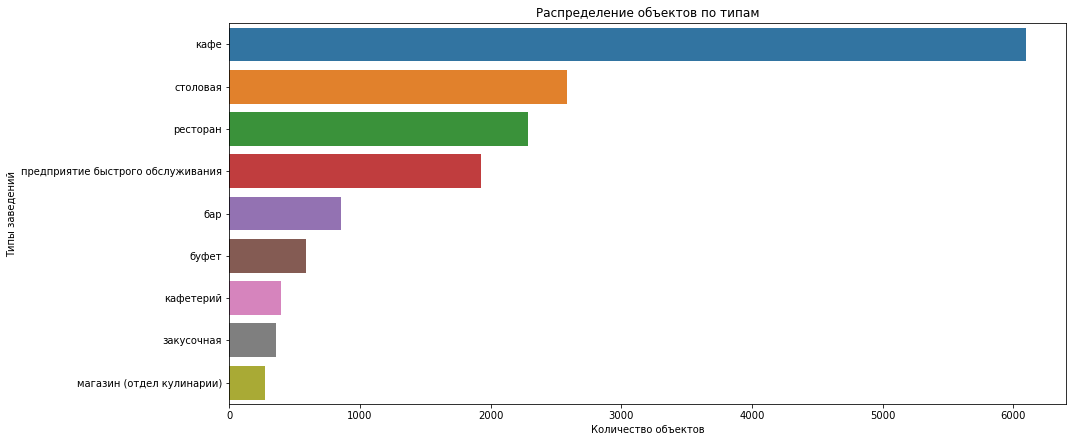

In [9]:
plt.figure(figsize=(15, 7))
sns.barplot(x='id', y='object_type', data=type_group)
plt.title('Распределение объектов по типам')
plt.xlabel('Количество объектов')
plt.ylabel('Типы заведений')
plt.show()

Больше всего среди объектов кафе. Это объяснимо - понятие "кафе" размытое, и под него подходит широкий спектр заведений - по размерам, по ценовым категориям и так далее. 

### Сетевые заведения

Исследуем, как распределены сетевые и несетевые объекты.

In [10]:
chain_group = df.groupby('chain')['id'].count().sort_values(ascending=False).reset_index()
chain_group

chain     id
0   нет  12398
1    да   2968

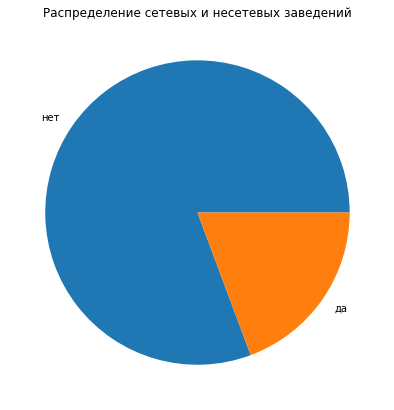

In [11]:
plt.figure(figsize = (7, 7))
plt.pie(chain_group.id, labels=chain_group.chain)
plt.title('Распределение сетевых и несетевых заведений')
plt.show()

Менее одной пятой всех объектов относятся к каким-либо сетям.

Проверим, что в сетях действительно присутствуют несколько объектов. 

In [12]:
chain_size = df.query('chain == "да"').groupby('object_name_good')['id'].count().reset_index()
chain_size['id'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.999])

count   446.00
mean      6.65
std      19.47
min       1.00
5%        1.00
25%       1.00
50%       1.00
75%       4.00
95%      27.00
99.9%   178.55
max     183.00
Name: id, dtype: float64

Более половины "сетей" состоят из всего одного объекта, среднее количество точек в сети - 6, а максимальное - 183.

In [13]:
# сети, состоящие всего из одного объекта
len(chain_size.query('id == 1'))

238

Несмотря на предварительную очистку названий объектов, количество "сетевых", но при этом одиночных точек, внушительное. Скорее всего, не все названия удалось привести к одинаковому, так, чтобы удалось их объединить, или, возможно, другие точки расположены не в Москве. 

In [14]:
# самые большие сети
chain_size_top = chain_size.sort_values('id', ascending=False).head(11)
chain_size_top

object_name_good   id
433      шоколадница  183
26               kfc  173
238       макдоналдс  165
108      бургер кинг  146
387          теремок  106
163   домино'с пицца   97
220  крошка картошка   93
372         суши wok   75
248            милти   72
277       папа джонс   65
161       додо пицца   53

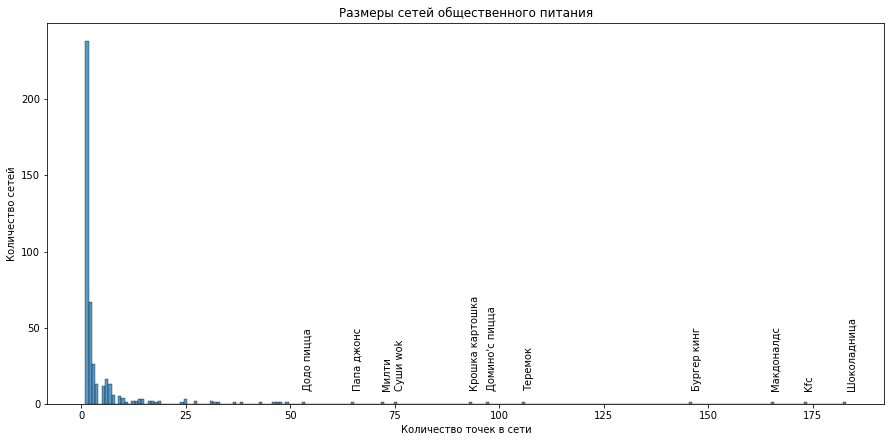

In [15]:
plt.figure(figsize=(15, 7))
sns.histplot(data=chain_size, x='id') 
plt.xlabel('Количество точек в сети')
plt.ylabel('Количество сетей')
for i, row in chain_size_top.iterrows():
    plt.text(row['id'], 10, row['object_name_good'].capitalize(), rotation=90)
# plt.grid()
plt.title('Размеры сетей общественного питания')
plt.show()

Посмотрим, для каких типов объектов принадлежность к сетям более характерна. 

In [16]:
chain_type = df.pivot_table(index = 'object_type', values='id', columns = 'chain', aggfunc='count').reset_index()
chain_type['total'] = chain_type['нет'] + chain_type['да']
chain_type['rate'] = chain_type['да'] / chain_type['total']
chain_type = chain_type.sort_values(by='rate', ascending=False)
display(chain_type)

chain                        object_type    да   нет  total  rate
6      предприятие быстрого обслуживания   791  1132   1923  0.41
5              магазин (отдел кулинарии)    78   195    273  0.29
7                               ресторан   544  1741   2285  0.24
3                                   кафе  1396  4703   6099  0.23
2                             закусочная    56   304    360  0.16
4                              кафетерий    52   346    398  0.13
0                                    бар    37   819    856  0.04
1                                  буфет    11   574    585  0.02
8                               столовая     3  2584   2587  0.00

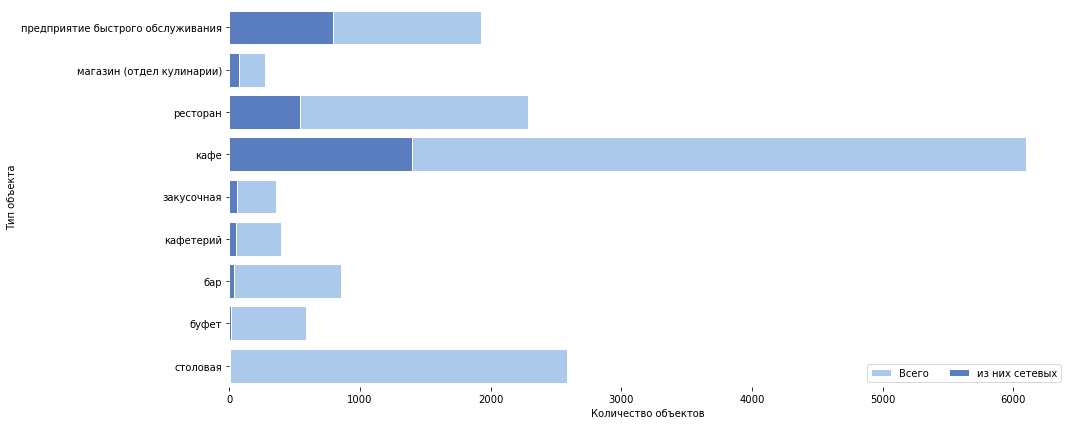

In [17]:
f, ax = plt.subplots(figsize = (15,7))
sns.set_color_codes('pastel')
sns.barplot(x = 'total', y = 'object_type', data = chain_type,
            label = 'Всего', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(x = 'да', y = 'object_type', data = chain_type,
            label = 'из них сетевых', color = 'b', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right')
ax.set(ylabel="Тип объекта", xlabel="Количество объектов")
sns.despine(left = True, bottom = True)
plt.show()

Больше всего сетевых заведений среди предприятий быстрого обслуживания (фастфудов), более 40%  заведений этого типа относятся к сетевым. На втором месте отделы кулинарии в магазинах - среди них доля сетевых почти 30%.

### Количество посадочных мест

Для каждого типа объекта подсчитаем среднее количество посадочных мест. 

In [18]:
# как вообще распределены размеры заведений
df.number.describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.999])

count   15366.00
mean       59.55
std        74.74
min         0.00
5%          0.00
25%        12.00
50%        40.00
75%        80.00
95%       214.00
99.9%     637.07
max      1700.00
Name: number, dtype: float64

In [19]:
df.query('number > 650')

id                                   object_name chain object_type  \
2313    26560                              Ресторан «АЛЬФА»   нет    ресторан   
2317    73306                               Ресторан «БЕТА»   нет    ресторан   
3686    27026                                    РУМ СЕРВИС   нет    ресторан   
4110    29320                                      Столовая   нет    столовая   
4480    27024                                    РУМ СЕРВИС   нет    ресторан   
5649    29232  СТОЛОВАЯ МОСКОВСКИЙ ГУМАНИТАРНЫЙ УНИВЕРСИТЕТ   нет    столовая   
7280    26269                          Ресторан «Шахин Шах»   нет    ресторан   
8148    80291                            Банкетный зал Шелк   нет    ресторан   
8345    27750                                СТОЛОВАЯ-БУФЕТ   нет    столовая   
9064    19719    КОМБИНАТ ПИТАНИЯ «УПРАВЛЕНИЕ АКАДЕМСЕРВИС»   нет    столовая   
9955   171116                                        EATALY   нет    ресторан   
12723  199696                          Arena by Soho Family   нет         бар   
13299  200905                                    White Hall   нет    ресторан   

                                                 address  number  \
2313   город Москва, Измайловское шоссе, дом 71, корп...    1040   
2317   город Москва, Измайловское шоссе, дом 71, корп...     660   
3686                 город Москва, площадь Европы, дом 2    1200   
4110               город Москва, Каширское шоссе, дом 31     680   
4480   город Москва, Кутузовский проспект, дом 2/1, с...    1200   
5649       город Москва, улица Юности, дом 5, строение 1     760   
7280   город Москва, улица Маршала Захарова, дом 6, к...     675   
8148   город Москва, Большой Саввинский переулок, дом...    1500   
8345                город Москва, улица Волхонка, дом 15    1400   
9064   город Москва, проспект Вернадского, дом 84, ст...    1288   
9955                 город Москва, Киевская улица, дом 2     920   
12723  город Москва, Кутузовский проспект, дом 36, ст...    1700   
13299              город Москва, Ферганская улица, дом 8     700   

                       street_name                          object_name_good  
2313            Измайловское шоссе                                     альфа  
2317            Измайловское шоссе                                      бета  
3686                площадь Европы                                рум сервис  
4110               Каширское шоссе                                  столовая  
4480          Кутузовский проспект                                рум сервис  
5649                  улица Юности       московский гуманитарный университет  
7280        улица Маршала Захарова                                 шахин шах  
8148   Большой Саввинский переулок                        банкетный зал шелк  
8345                улица Волхонка                            столовая-буфет  
9064          проспект Вернадского  комбинат питания управление академсервис  
9955                Киевская улица                                    eataly  
12723         Кутузовский проспект                      arena by soho family  
13299             Ферганская улица                                white hall

Признаем выбросами объекты размером более 650 мест - в основном это рестораны при гостиницах, столовые при университетах и банкетные залы. 

In [20]:
# подсчитаем среднее по видам заведений
df.query('number < 650').groupby('object_type')['number'].mean().sort_values(ascending=False).reset_index()

object_type  number
0                           столовая  128.85
1                           ресторан   93.22
2                              буфет   51.13
3                                бар   41.56
4                               кафе   39.72
5  предприятие быстрого обслуживания   20.55
6                          кафетерий    9.12
7                         закусочная    7.61
8          магазин (отдел кулинарии)    5.59

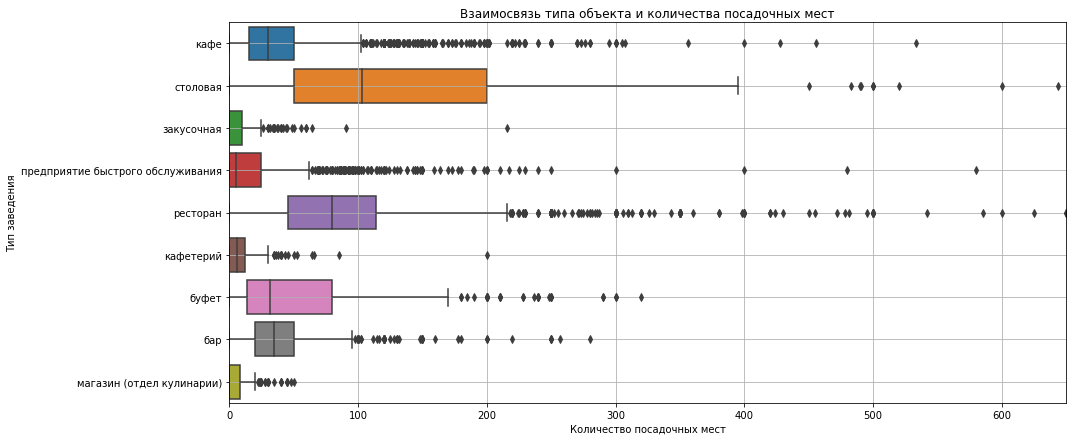

In [21]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='number', y='object_type', data=df) 
plt.xlabel('Количество посадочных мест')
plt.ylabel('Тип заведения')
plt.xlim(0, 650)
plt.grid()
plt.title('Взаимосвязь типа объекта и количества посадочных мест')
plt.show()

Наибольшее среднее количество посадочных мест в столовых и ресторанах, меньше всего в кулинариях и закусочных. 

Посмотрим, какое количество посадочных мест характерно для сетевых заведений и построим график.

In [22]:
df.query('chain == "да"')['number'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99])

count   2968.00
mean      52.92
std       57.14
min        0.00
5%         0.00
25%       15.00
50%       40.00
75%       72.00
95%      158.65
99%      275.33
max      580.00
Name: number, dtype: float64

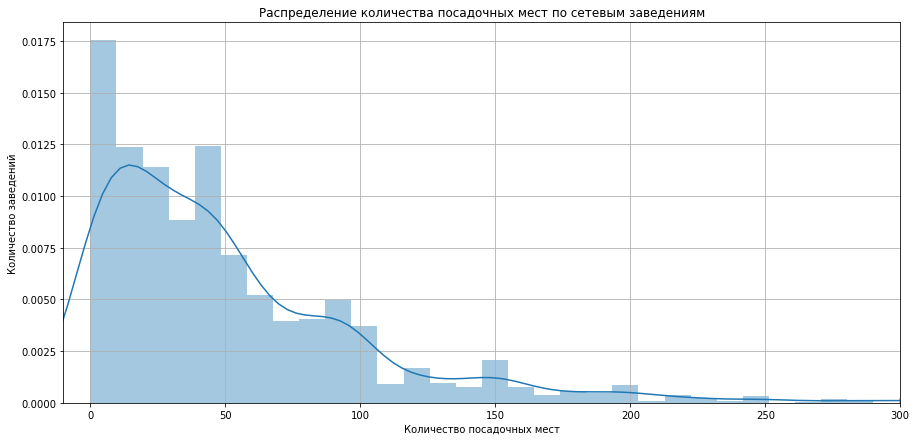

In [23]:
# ограничим график нижними 99% по оси X - до 300 мест
plt.figure(figsize = (15, 7))
sns.distplot(df.query('chain == "да"')['number'], bins=60)
plt.xlabel('Количество посадочных мест')
plt.xlim(-10, 300)
plt.grid()
plt.ylabel('Количество заведений')
plt.title('Распределение количества посадочных мест по сетевым заведениям')
plt.show()

В 99% заведений количество мест не превышает 300, а в половине объектов не более 40 мест. Таким образом, среди сетевых заведений большинство относительно небольших. 

In [24]:
a = len(df.query('chain == "да" and number <= 100')) / len(df.query('chain == "да"'))
print(f'Доля сетевых заведений до 100 посадочных мест - {a:.2%}')

Доля сетевых заведений до 100 посадочных мест - 88.34%


Посмотрим, что более характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест.

Добавим к таблице `chain_size` столбец со средним количеством посадочных мест среди точек сети и расстортируем на четыре квадранта - по количеству заведений в сети (много-мало) и по среднему количеству мест (много-мало). Перед этим отфильтруем из сетей "бракованные" - с 1 заведением.

In [25]:
chain_size_good = (
    df.query('chain == "да"').groupby('object_name_good')
    .agg({'id' : 'count', 'number' : 'mean'}).query('id > 1').reset_index()
)
chain_size_good.describe()

id  number
count 208.00  208.00
mean   13.12   56.36
std    27.14   47.39
min     2.00    0.00
25%     2.00   19.22
50%     4.00   43.25
75%     9.00   80.60
max   183.00  245.00

За границу "мало-много" для размера сети примем медиану, 4 заведения, для среднего размера объекта - 40 посадочных мест.

In [26]:
# категория по размеру сети
chain_size_good['rest_num_group'] = 'Мало заведений'
chain_size_good.loc[chain_size_good['id'] > 4, 'rest_num_group'] = 'Много заведений'

# категория по среднему количеству посадочных мест
chain_size_good['seat_num_group'] = 'Мало мест'
chain_size_good.loc[chain_size_good['number'] > 40, 'seat_num_group'] = 'Много мест'

# создаем группы по обоим признакам
chain_size_good['group'] = chain_size_good['rest_num_group'].astype(str) + '-' + chain_size_good['seat_num_group'].astype(str)
chain_size_good.head()

object_name_good  id  number   rest_num_group seat_num_group  \
0          bocconcino   3   66.67   Мало заведений     Много мест   
1         burger club   3   20.33   Мало заведений      Мало мест   
2  coffeeshop company   4   47.25   Мало заведений     Много мест   
3               cofix  25    9.60  Много заведений      Мало мест   
4             correas   3   44.00   Мало заведений     Много мест   

                       group  
0  Мало заведений-Много мест  
1   Мало заведений-Мало мест  
2  Мало заведений-Много мест  
3  Много заведений-Мало мест  
4  Мало заведений-Много мест

In [27]:
# собираем сети в группы
chain_size_grouped = chain_size_good.groupby('group').agg({'object_name_good' : 'nunique', 'id' : 'median', 'number' : 'median' })
chain_size_grouped.set_axis(['Число сетей в группе', 'Медианное число заведений', 'Медианное число посадочных мест'], 
                            axis='columns', inplace=True)
chain_size_grouped.sort_values('Число сетей в группе', ascending=False)

Число сетей в группе  Медианное число заведений  \
group                                                                         
Мало заведений-Много мест                     59                       2.00   
Много заведений-Мало мест                     53                       9.00   
Много заведений-Много мест                    49                      10.00   
Мало заведений-Мало мест                      47                       2.00   

                            Медианное число посадочных мест  
group                                                        
Мало заведений-Много мест                             76.33  
Много заведений-Мало мест                             19.22  
Много заведений-Много мест                            83.33  
Мало заведений-Мало мест                              18.00

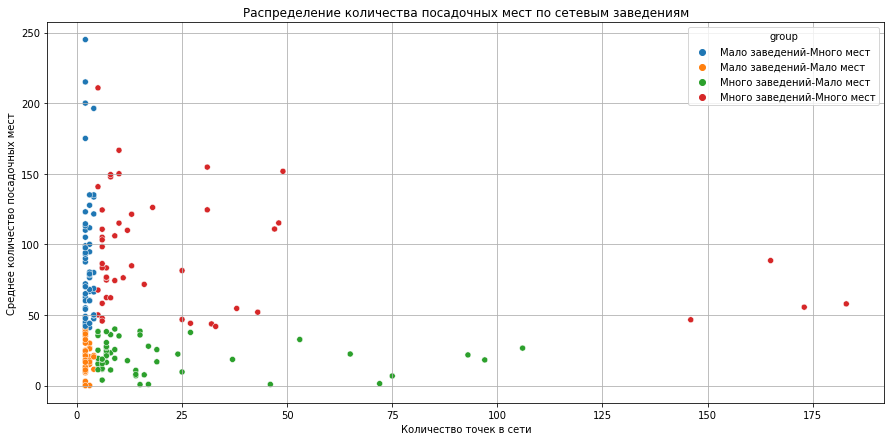

In [28]:
# построим график
plt.figure(figsize = (15, 7))
sns.scatterplot(data = chain_size_good, x='id', y='number', hue = 'group')
plt.xlabel('Количество точек в сети')
plt.grid()
plt.ylabel('Среднее количество посадочных мест')
plt.title('Распределение количества посадочных мест по сетевым заведениям')
plt.show()

Таким образом, больше всего сетей, в которых мало объектов (от 2 до 4) и много посадочных мест (от 40 и выше) - таких 59 из 208.

### Расположение объектов

Ранее мы выделили из адресов объектов улицы. Составим топ-10 улиц по количеству объектов общественного питания.

In [29]:
df.groupby('street_name')['id'].count().sort_values(ascending=False).head(10)

street_name
город Зеленоград          232
проспект Мира             204
Профсоюзная улица         182
Ленинградский проспект    171
Пресненская набережная    167
Варшавское шоссе          161
Ленинский проспект        147
поселение Сосенское       138
проспект Вернадского      132
Кутузовский проспект      114
Name: id, dtype: int64

Среди улиц затесались два пригорода. Отфильтруем их.

In [30]:
streets_top = df.query('street_name not in ["город Зеленоград", "поселение Сосенское"]').groupby('street_name')['id'].count().sort_values(ascending=False).head(10).reset_index()
streets_top.set_axis(['street_name', 'objects'], axis = 'columns', inplace=True)
streets_top

street_name  objects
0           проспект Мира      204
1       Профсоюзная улица      182
2  Ленинградский проспект      171
3  Пресненская набережная      167
4        Варшавское шоссе      161
5      Ленинский проспект      147
6    проспект Вернадского      132
7    Кутузовский проспект      114
8         Каширское шоссе      112
9    Кировоградская улица      110

Проанализируем, какого размера заведения расположены на этих улицах. Ограничим график 99-перцентилем - 300 посадочных мест.

count   1500.00
mean      58.02
std       90.06
min        0.00
5%         0.00
25%       12.00
50%       40.00
75%       75.00
95%      200.00
99%      300.00
max     1700.00
Name: number, dtype: float64


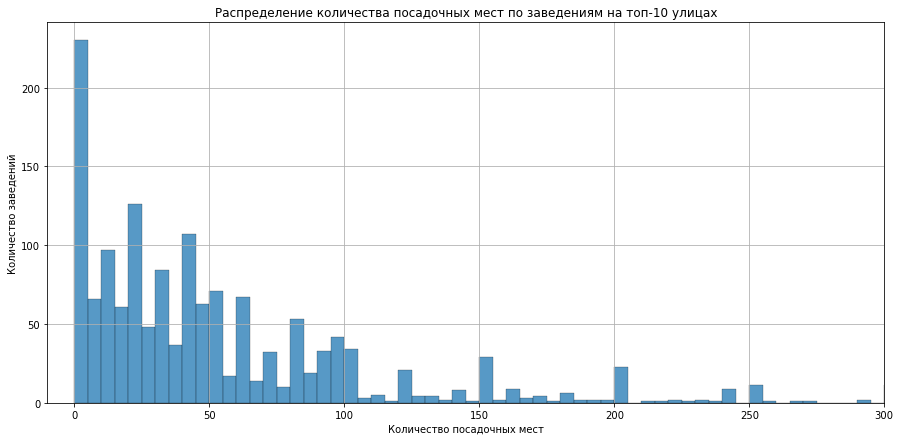

In [31]:
print(df.query('street_name in @streets_top.street_name')['number'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]))

plt.figure(figsize = (15, 7))
sns.histplot(df.query('street_name in @streets_top.street_name')['number'], bins=340)
plt.xlabel('Количество посадочных мест')
plt.grid()
plt.xlim(-10, 300)
plt.ylabel('Количество заведений')
plt.title('Распределение количества посадочных мест по заведениям на топ-10 улицах')
plt.show()

In [32]:
df.query('street_name in @streets_top.street_name').groupby('street_name')['number'].median().sort_values(ascending=False)

street_name
проспект Мира            46.50
Ленинский проспект       45.00
Кутузовский проспект     40.00
Ленинградский проспект   40.00
проспект Вернадского     40.00
Варшавское шоссе         30.00
Кировоградская улица     30.00
Пресненская набережная   30.00
Каширское шоссе          25.00
Профсоюзная улица        24.00
Name: number, dtype: float64

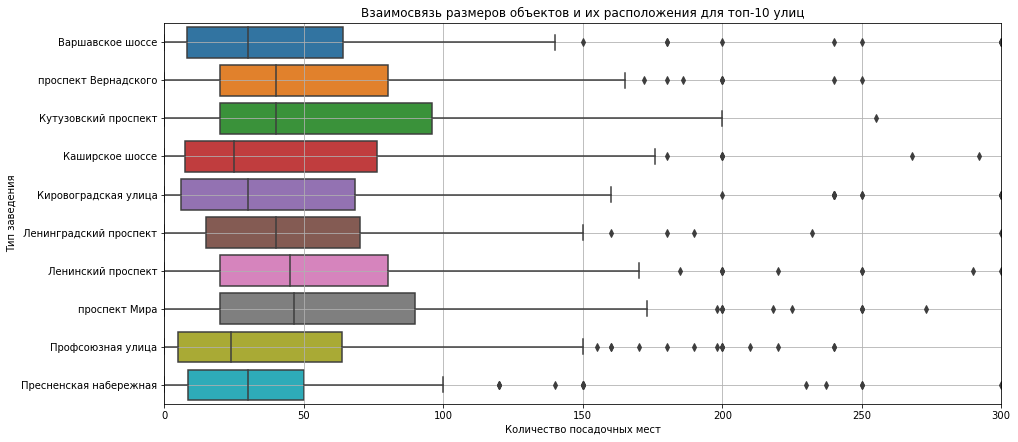

In [33]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='number', y='street_name', data=df.query('street_name in @streets_top.street_name')) 
plt.xlabel('Количество посадочных мест')
plt.ylabel('Тип заведения')
plt.xlim(0, 300)
plt.grid()
plt.title('Взаимосвязь размеров объектов и их расположения для топ-10 улиц')
plt.show()

Вместимость большинства заведений на самых популярных улицах не превышает 200 посадочных мест, медианная колеблется от 24 до 46.

При этом у более чем 5% из них вообще нет посадочных мест.

In [34]:
# импортируем базу улиц Москвы
from io import BytesIO
import requests
spreadsheet_id = '1TTCzCEPPTPlE7pVIvZ3n65AOOX0CH2way_sW3qevXug'
file_name = f'https://docs.google.com/spreadsheets/d/{spreadsheet_id}/export?format=csv'
r = requests.get(file_name)
df_streets = pd.read_csv(BytesIO(r.content))

df_streets.head()

street_name  areaid okrug               area
0             Выставочный переулок      17   ЦАО  Пресненский район
1                     улица Гашека      17   ЦАО  Пресненский район
2          Большая Никитская улица      17   ЦАО  Пресненский район
3                Глубокий переулок      17   ЦАО  Пресненский район
4  Большой Гнездниковский переулок      17   ЦАО  Пресненский район

In [35]:
# присоединим данные о районах города
streets_top = streets_top.merge(df_streets, on='street_name', how='left')
# сгруппируем таблицу по названиям улиц и посчитаем, через сколько районов она проходит
streets_top = streets_top.groupby('street_name').agg({'objects':'first', 'areaid':'nunique'}).reset_index()

In [36]:
streets_top.sort_values('objects', ascending=False)

street_name  objects  areaid
9           проспект Мира      204       7
7       Профсоюзная улица      182       6
4  Ленинградский проспект      171       4
6  Пресненская набережная      167       1
0        Варшавское шоссе      161       8
5      Ленинский проспект      147       8
8    проспект Вернадского      132       5
3    Кутузовский проспект      114       2
1         Каширское шоссе      112       4
2    Кировоградская улица      110       3

Можно заметить, что больше всего заведений на самых длинных улицах, огромных проспектах, шоссе, разбегающихся от Садового кольца к краям города и проходящих по нескольким районам. Выделяется сравнительно небольшая Пресненская набережная - на этом участке берега Москвы-реки расположен Москва-Сити, деловая доминанта города. 

Найдем число улиц с одним объектом общественного питания.

In [37]:
low_streets = df.groupby('street_name')['id'].count().sort_values(ascending=True).reset_index().query('id == 1')
# переименуем столбцы
low_streets.set_axis(['street_name', 'objects'], axis = 'columns', inplace=True)

# добавим информацию о районах
low_streets = low_streets.merge(df_streets, on='street_name', how='left')

# сгруппируем по названию улиц и подсчитаем количество районов для каждой
low_streets = low_streets.groupby('street_name').agg({'areaid':'nunique', 'okrug':'first', 'area':'first'}).reset_index()

In [38]:
# сгруппируем улицы по округам
low_okrug = low_streets.groupby('okrug')['street_name'].count().sort_values(ascending=False)
print(low_okrug.sum())
print(low_okrug)

517
okrug
ЦАО           171
СВАО           65
ВАО            64
САО            50
ЮВАО           50
ЗАО            41
ЮАО            26
СЗАО           25
ЮЗАО           24
Зеленоград      1
Name: street_name, dtype: int64


In [39]:
# сгруппируем улицы по районам
low_area = low_streets.groupby('area')[['street_name']].count().sort_values(by='street_name', ascending=False).reset_index()
low_area.head(10)

area  street_name
0      Таганский район           27
1      Басманный район           24
2      Район Хамовники           22
3       Тверской район           20
4    Пресненский район           19
5   Район Марьина роща           17
6     Район Сокольники           15
7          Район Арбат           14
8  Район Замоскворечье           14
9      Мещанский район           13

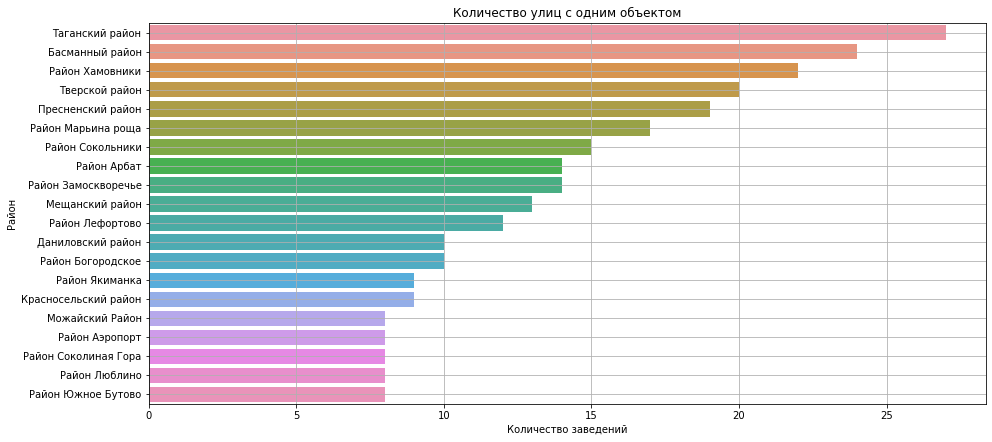

In [40]:
# построим график
plt.figure(figsize=(15, 7))
sns.barplot(x='street_name', y='area', data=low_area.head(20)) 
plt.xlabel('Количество заведений')
plt.ylabel('Район')
plt.grid()
plt.title('Количество улиц с одним объектом')
plt.show()

In [41]:
# в отличие от "густонаселенных" шоссе и проспектов, улицы с одним объектом умещаются в один район
print('Среднее количество районов, через которое пролегают улицы с одним объектом:', low_streets.areaid.median())

Среднее количество районов, через которое пролегают улицы с одним объектом: 1.0


Всего на 517 улицах в предоставленных данных располагается по одному объекту. Треть из этих улиц - маленькие переулки в центре, но достаточно и проездов среди цехов в промзонах, и улиц в спальных районах, на которых просто мало точек общественного питания.

Косвенно о длине улицы можно судить по количеству районов, через которые она пролегает. Для улиц с одним объектом медианное количество районов - всего один район, в отличие от улиц из топ-10 по количеству объектов.

В топ-10 районов с наибольшим количеством улиц с одним объектом входят 8 районов Центрального округа и два (Марьина роща и Сокольники) примыкают к ЦАО. 

<img src='https://avatars.mds.yandex.net/get-zen_doc/3380298/pub_605b429cc0f40244ebe343ae_605b46293bd1fd3f669f3c3f/scale_2400'>

Объединим исходные данные с информацией о расположении улиц по районам и округам Москвы.

Так как многие улицы пролегают по нескольким районам, оставим только первый из них. Данным искажением придется принебречь - определять точное расположение дома в том или ином районе чересчур сложно.

Построим графики.

In [42]:
df_areas = df.merge(df_streets, on='street_name', how='left').groupby('id').agg({'object_name_good':'first', 
                                                                                 'chain':'first',
                                                                                 'object_type':'first',
                                                                                 'address' : 'first',  
                                                                                 'number' :'first', 
                                                                                 'street_name':'first', 
                                                                                 'okrug':'first', 
                                                                                 'area':'first'}).reset_index()

areas_type = df_areas.pivot_table(index='okrug', columns='object_type', values='id', 
                                  aggfunc='count', fill_value=0, margins=True).reset_index()
areas_type.drop(10, axis=0, inplace=True)
areas_type.sort_values('All', ascending=False)

object_type       okrug  бар  буфет  закусочная  кафе  кафетерий  \
6                   ЦАО  394    140          41  2175         88   
7                   ЮАО  100     36          60   628         61   
1                   ЗАО   55     82          17   526         11   
3                   САО   48     70          29   507         54   
4                  СВАО   46     49          40   500         47   
0                   ВАО   68     54          39   379         46   
9                  ЮЗАО   39     29          21   355         18   
8                  ЮВАО   28     62          51   304         11   
5                  СЗАО   39     21          24   201         18   
2            Зеленоград   12      6           0   136         31   

object_type  магазин (отдел кулинарии)  предприятие быстрого обслуживания  \
6                                   33                                212   
7                                   30                                476   
1                                    9                                159   
3                                   16                                158   
4                                   22                                206   
0                                   59                                237   
9                                   21                                127   
8                                    4                                 91   
5                                   53                                111   
2                                    1                                 40   

object_type  ресторан  столовая   All  
6                 956       356  4395  
7                 200       385  1976  
1                 263       259  1381  
3                 211       251  1344  
4                 108       314  1332  
0                 106       286  1274  
9                 110       180   900  
8                  88       208   847  
5                  94       160   721  
2                  33       101   360

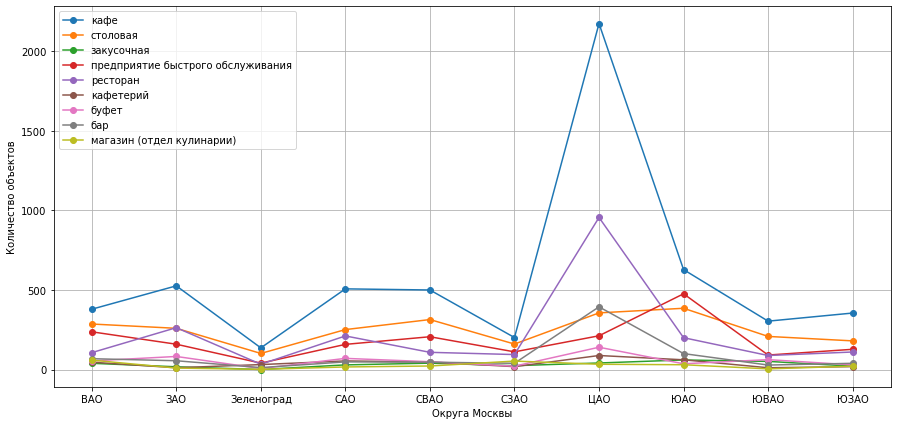

In [43]:
fig, ax = plt.subplots(figsize=(15, 7))

for i in list(df.object_type.unique()):
    ax.plot(areas_type.okrug, areas_type.loc[:, i], marker ='o', label=i)
plt.xticks(areas_type.okrug)
plt.xlabel('Округа Москвы')
plt.ylabel('Количество объектов')
plt.grid()
plt.legend(loc='upper left')
plt.show()

Максимальное количество объектов - в плотно населенном Центральном округе. 

count   4395.00
mean      56.83
std       63.63
min        0.00
25%       20.00
50%       42.00
75%       75.50
max     1500.00
Name: number, dtype: float64


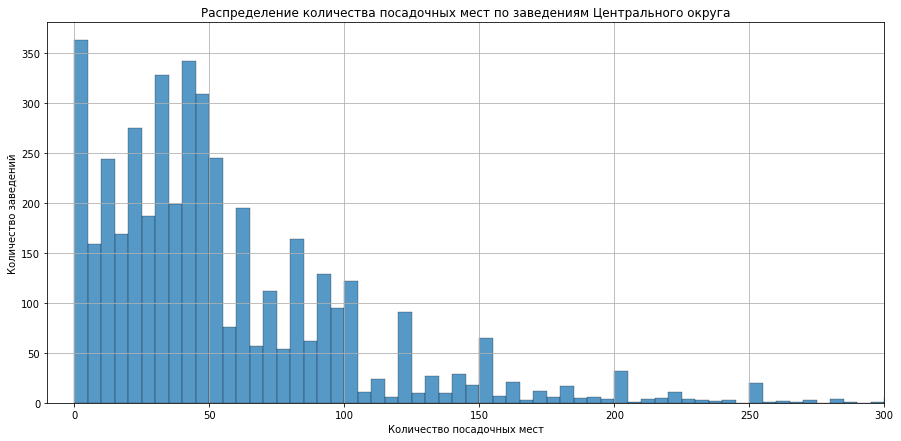

In [44]:
print(df_areas.query('okrug == "ЦАО"')['number'].describe())

plt.figure(figsize = (15, 7))
sns.histplot(df_areas.query('okrug == "ЦАО"')['number'], bins=300)
plt.xlabel('Количество посадочных мест')
plt.grid()
plt.xlim(-10, 300)
plt.ylabel('Количество заведений')
plt.title('Распределение количества посадочных мест по заведениям Центрального округа')
plt.show()

## Выводы

В ходе работы мы проанализировали данные о более чем 15 тысячах объектах общественного питания в Москве.

Анализ несколько затруднен отсутствием единого шаблона для названий заведений. 

- Больше всего среди объектов кафе, ресторанов, столовых и фастфудов. Среднее количество посадочных мест - 60, оно больше для столовых и ресторанов и меньше для баров, кафе и фастфудов.

- На основании имеющихся данных можно увидеть, что больше всего объектов расположены в центральном округе Москвы. Также точкой притяжения является районе Москва-Сити. Среди них также популярнее всего кафе и рестораны. Исключение составляют фастфуды и столовые - их больше в Южном округе. По размеру заведения в ЦАО в среднем рассчитаны на 56 мест. 

- Среди всех объектов около 20% относятся к тем или иным сетям общественного питания. Всего таких сетей более 440, но более половины из них состоят всего из 1 точки. Самые обширные по количеству точек - "Шоколадница", "KFC", "Макдоналдс", "Бургер кинг" и "Теремок". Наибольшая доля сетевых заведений среди фастфудов и кулинарий при магазинах. Несмотря на существование больших сетей, чаще сети состоят из 2-4 точек со средним размером около 80 посадочных мест.

## Презентация

<a href='https://docs.google.com/presentation/d/1OukOrLrFM3rdGt9PnhtisNds-ESBDvS3wWC78LCLl88/edit?usp=sharing'>Ссылка на Гугл-презентацию</a>

<a href='https://drive.google.com/file/d/1ryH_5Y58Hm9jloyv0wwAbfZW2x7Wty8v/view?usp=sharing'>Ссылка на pdf-версию</a>


